# IFI 8420 Assignment 4: LASSO, Tree Regression, and Cross Validation
**Contributors**: 

## Part 1: LASSO Regression
We will predict the number of applications received (`Apps`) using all other variables in the College dataset.

### (1a) Split the data set randomly into training and test data set. 	(5 points)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

college = pd.read_csv('/Users/silvanacardoza/Documents/IFI 8240/Codes/College.csv')  
college = college.drop(columns=["Unnamed: 0"], errors='ignore')
college = pd.get_dummies(college, drop_first=True)

X = college.drop(columns=["Apps"])
y = college["Apps"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### (1b) Fit Lasso model using on the training data set.  (5 points)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### (1c) Perform cross-validation on the training data set to choose the best lambda.  (5 points)

In [17]:
lasso_cv = LassoCV(cv=10, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)
best_lambda = lasso_cv.alpha_


### (1d) Estimate the predicted values using the best lambda obtained in part (c) on the test data and compute test MSE. (10 points)

In [19]:

lasso_best = Lasso(alpha=best_lambda)
lasso_best.fit(X_train_scaled, y_train)
y_pred = lasso_best.predict(X_test_scaled)
test_mse_lasso = mean_squared_error(y_test, y_pred)
print("Test MSE (LASSO):", test_mse_lasso)


Test MSE (LASSO): 1928315.1520712555


### (1e) Compare the Lasso predicted test MSE (with the best lambda) with the null model (lambda=infinity) test MSE and least square regression model (lambda=0) test MSE. What do you conclude?  (10 points)

In [21]:

#Null model
y_mean = np.mean(y_test)
null_mse = mean_squared_error(y_test, [y_mean] * len(y_test))

#Least squares model
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)
y_pred_ols = ols.predict(X_test_scaled)
test_mse_ols = mean_squared_error(y_test, y_pred_ols)

print("Best lambda:", best_lambda)
print("Test MSE (Null Model):", null_mse)
print("Test MSE (OLS):", test_mse_ols)

#Need to add explanation?##


Best lambda: 3.7841738995258773
Test MSE (Null Model): 13538044.75410914
Test MSE (OLS): 1931803.1942070317


### (1f) Now construct the Lasso model for the entire data set and obtain the Lasso coefficients using the best lambda obtained in part (c) and report the number of non-zero coefficient estimates.    (7 points)

In [23]:

scaler_full = StandardScaler()
X_scaled_full = scaler_full.fit_transform(X)
lasso_full = Lasso(alpha=best_lambda)
lasso_full.fit(X_scaled_full, y)
non_zero_coefs = np.sum(lasso_full.coef_ != 0)
print("Number of non-zero coefficients:", non_zero_coefs)


Number of non-zero coefficients: 17


### (1g) Now use the Lasso predictors obtained in part (f) to fit the Linear Regression Model and report the summary of the linear model. (8 points)

In [25]:

selected_features = X.columns[lasso_full.coef_ != 0]
lr = LinearRegression()
lr.fit(X[selected_features], y)

print("\nLinear Regression Summary with Selected Features:")
for feat, coef in zip(selected_features, lr.coef_):
    print(f"{feat}: {coef:.4f}")



Linear Regression Summary with Selected Features:
Accept: 1.5858
Enroll: -0.8807
Top10perc: 49.9263
Top25perc: -14.2345
F.Undergrad: 0.0574
P.Undergrad: 0.0444
Outstate: -0.0859
Room.Board: 0.1510
Books: 0.0209
Personal: 0.0311
PhD: -8.6785
Terminal: -3.3307
S.F.Ratio: 15.3896
perc.alumni: 0.1787
Expend: 0.0779
Grad.Rate: 8.6676
Private_Yes: -494.1490


## Part 2: Regression Tree
Use the training and test data from Part 1.

### (2a) Fit a Regression Tree (max depth =3) to the training data, with Apps as the response and the all other variables as predictors. Create a plot of the tree. Note how many terminal nodes the tree has.							(4 points)

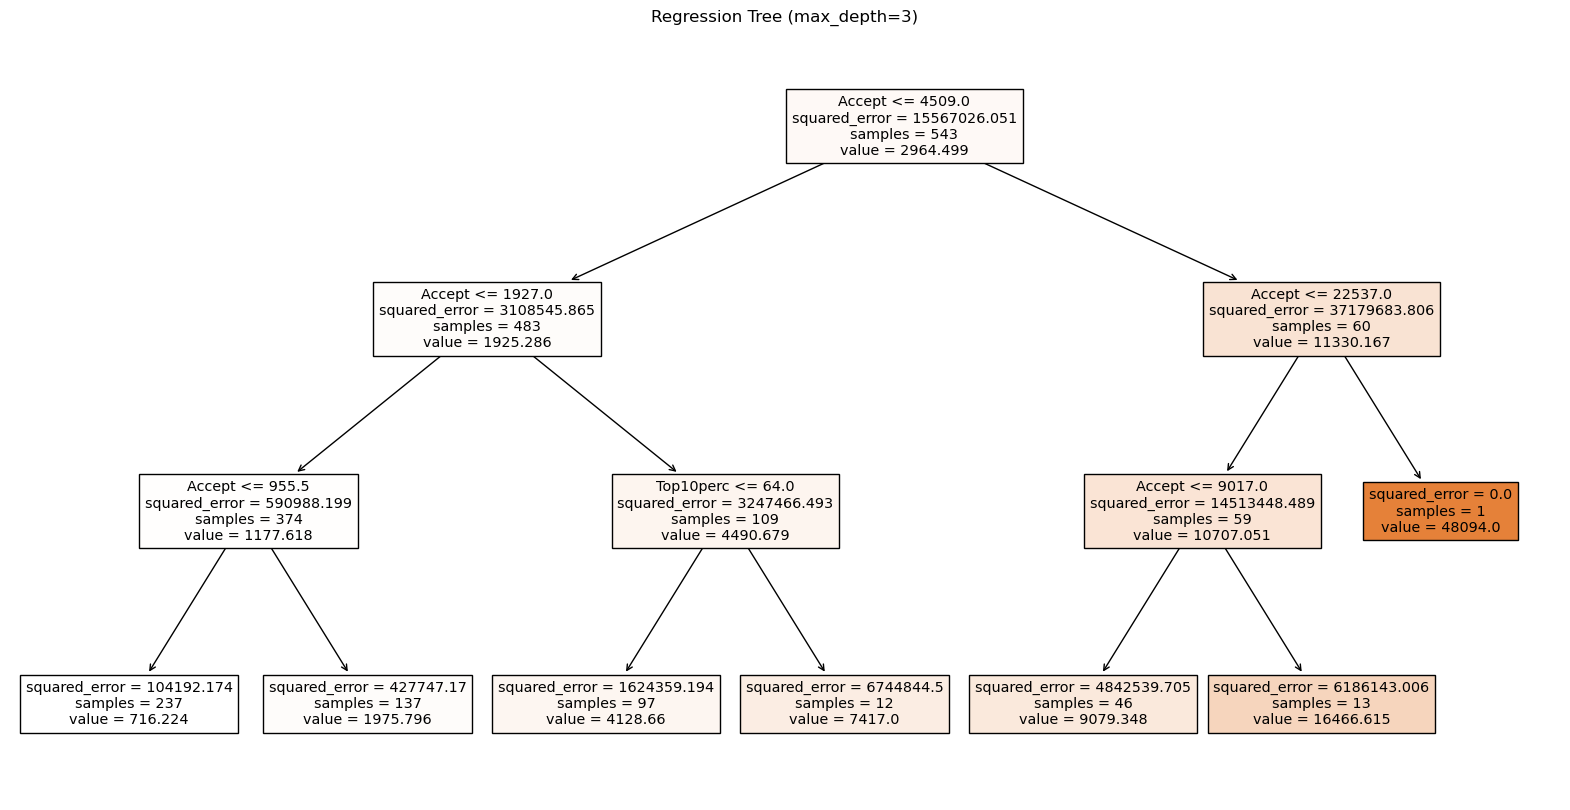

Number of terminal nodes: 7


In [27]:
from sklearn.tree 
import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.title("Regression Tree (max_depth=3)")
plt.show()

print("Number of terminal nodes:", tree.get_n_leaves())


### (2b) Print: Training accuracy and Test Accuracy, and  Test MSE,  	(6 points)

In [29]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_acc = tree.score(X_train, y_train)
test_acc = tree.score(X_test, y_test)
test_mse_tree = mean_squared_error(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Test MSE (Tree):", test_mse_tree)


Training Accuracy: 0.9260640812486342
Test Accuracy: 0.8181075683053116
Test MSE (Tree): 2462467.880716432


### (2c) Now to find the optimal depth that will improve performance use cost complexity pruning to prune the decision tree. 		(5 points)



In [35]:

path = tree.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas
impurities = path.impurities


### (2d) Based on part (c), produce a plot to observe total impurity versus effective alpha for training set. What do you observe?  	 (5 points)



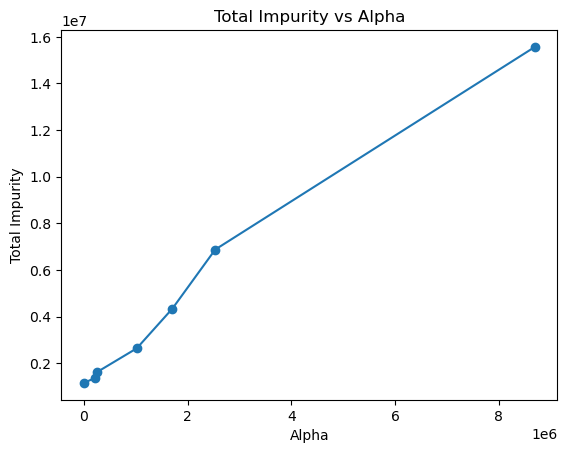

In [37]:

plt.figure()
plt.plot(alphas, impurities, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Total Impurity")
plt.title("Total Impurity vs Alpha")
plt.show()


### (2e) e.	Construct plots to display number of nodes versus alpha and tree depth versus alpha. What do you observe? 	(5 points)

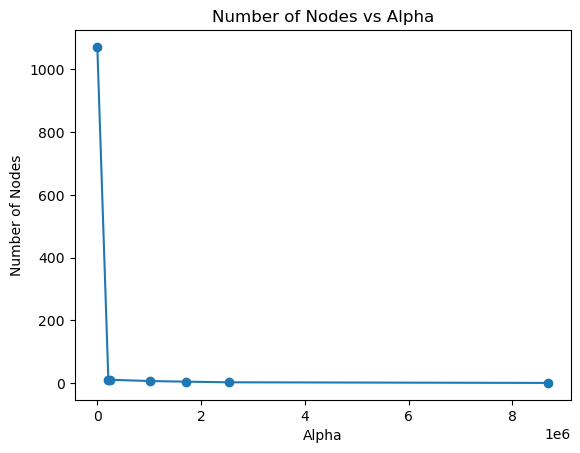

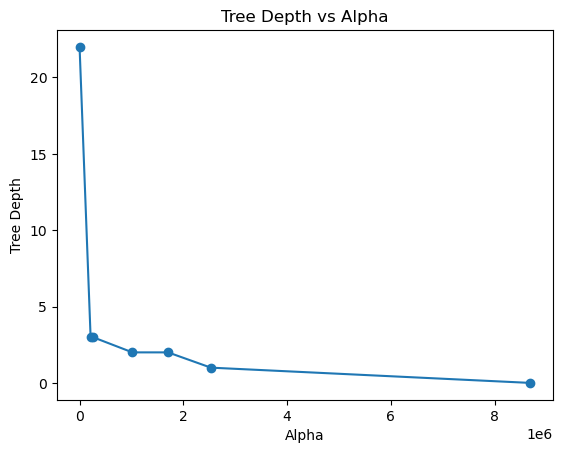

In [39]:

node_counts = []
depths = []
trees = []
for alpha in alphas:
    clf = DecisionTreeRegressor(ccp_alpha=alpha, random_state=42)
    clf.fit(X_train, y_train)
    node_counts.append(clf.tree_.node_count)
    depths.append(clf.get_depth())
    trees.append(clf)

plt.figure()
plt.plot(alphas, node_counts, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Number of Nodes")
plt.title("Number of Nodes vs Alpha")
plt.show()

plt.figure()
plt.plot(alphas, depths, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Tree Depth")
plt.title("Tree Depth vs Alpha")
plt.show()


### (2f) f.	Construct plot to observe changes of training and test accuracy with respect to alpha.  What do you observe?  (5 points)

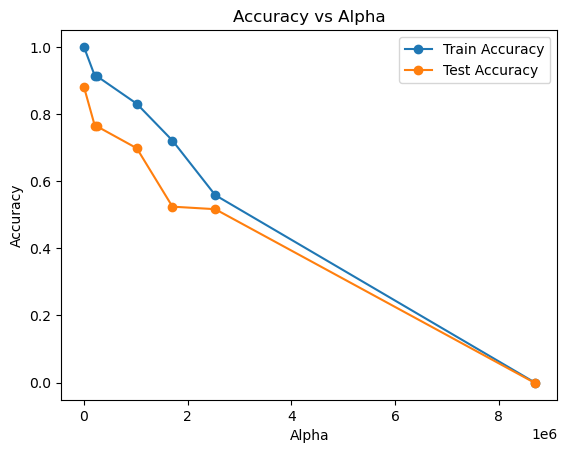

In [41]:

train_scores = []
test_scores = []
for clf in trees:
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure()
plt.plot(alphas, train_scores, label='Train Accuracy', marker='o')
plt.plot(alphas, test_scores, label='Test Accuracy', marker='o')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha")
plt.legend()
plt.show()


### (2g) g.	Find which alpha corresponds to the highest test score? Find the depth of the tree corresponding to the best alpha and create the tree using that depth. Print the decision tree.  Compute the mean squared test error corresponding to the tree with best alpha.  What do you observe? (5 points)

Best Alpha: 0.0
Tree Depth: 22
Test MSE (Best Tree): 1612219.2991452992


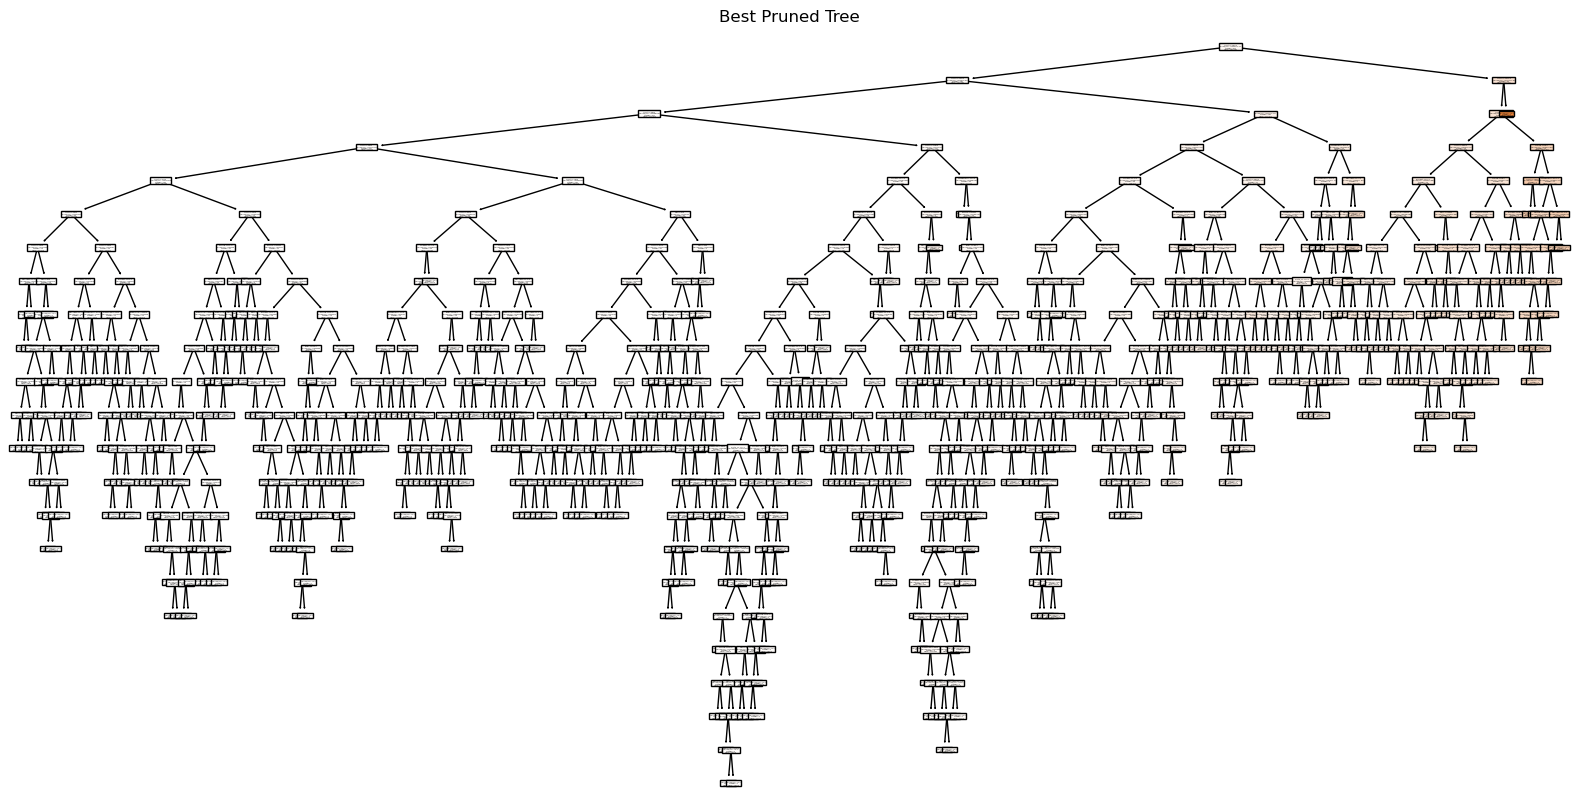

In [43]:

best_alpha_idx = np.argmax(test_scores)
best_alpha = alphas[best_alpha_idx]
best_tree = trees[best_alpha_idx]

print("Best Alpha:", best_alpha)
print("Tree Depth:", best_tree.get_depth())
print("Test MSE (Best Tree):", mean_squared_error(y_test, best_tree.predict(X_test)))

plt.figure(figsize=(20,10))
plot_tree(best_tree, feature_names=X.columns, filled=True)
plt.title("Best Pruned Tree")
plt.show()


### (2h) Compare the above test error rates in part (g) with the one obtained using LASSO regression (test MSE) in Part 1(d). Which model will you select for this decision problem and why? Provide a detail explanation. 		(15 points)

In [45]:

# explanation##
print("LASSO Test MSE:", test_mse_lasso)
print("Regression Tree Best Test MSE:", mean_squared_error(y_test, best_tree.predict(X_test)))
# Write conclusion and explanation in markdown


LASSO Test MSE: 1928315.1520712555
Regression Tree Best Test MSE: 1612219.2991452992


### Conclusion
[Write your explanation for model selection and why one model is preferred over the other here.]